<a href="https://colab.research.google.com/github/everestso/Spring2021/blob/main/s21DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree: Example One

In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Common imports
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
datasetsDir = "/content/gdrive/My Drive/csuf/S20/Resources/Datasets/"
csv_path = os.path.join(datasetsDir, "MlSimpleTest1 - Sheet4.csv")
data = pd.read_csv(csv_path)
print(data)

   y  A1  A2  A3
0  0   1   0   0
1  0   1   0   1
2  0   0   1   0
3  1   1   1   1
4  1   1   1   0


In [4]:
X = data.drop("y", axis=1)
Y=data['y'].values

classifier1 = DecisionTreeClassifier(criterion="gini")
classifier2 = DecisionTreeClassifier(criterion="entropy")
classifier1.fit(X,Y)
classifier2.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

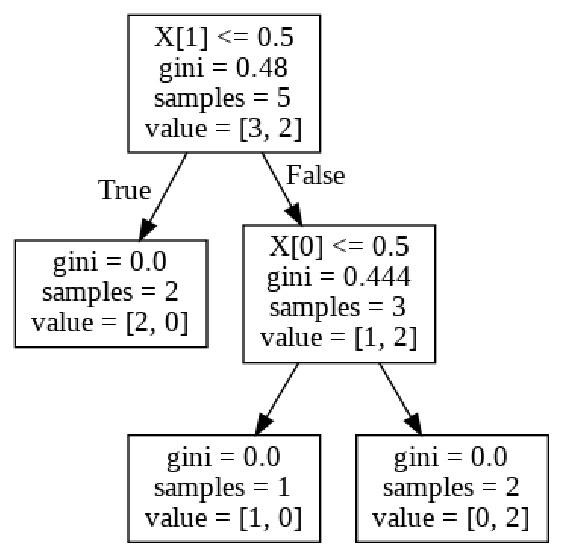

In [5]:
from sklearn import tree

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier1, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

# Decision Tree: Example Two

In [6]:
# load data
iris = load_iris()
print( iris.data.shape )

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

print(df.describe())
print(df.head(4))

(150, 4)
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...              

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.describe())
print( "\nTraining Percentages:\n" )
print(train_set.count()/df.count())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         120.000000        120.000000  ...        120.000000  120.000000
mean            5.809167          3.061667  ...          1.183333    0.991667
std             0.823805          0.449123  ...          0.752289    0.814736
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.750000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.400000  ...          1.800000    2.000000
max             7.700000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

Training Percentages:

sepal length (cm)    0.8
sepal width (cm)     0.8
petal length (cm)    0.8
petal width (cm)     0.8
target               0.8
dtype: float64


In [8]:
X = train_set.drop("target", axis=1) # drop labels for training set
Y = train_set['target'].copy()

classifier1 = DecisionTreeClassifier(max_depth=3, criterion="gini")
classifier2 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifier1.fit(X,Y)
classifier2.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
y_pred1 = classifier1.predict(X)
print ("Accuracy on Training (gini): ",sum(y_pred1==Y)/len(Y))

y_pred2 = classifier2.predict(X)
print ("Accuracy on Training (entropy): ",sum(y_pred2==Y)/len(Y))

Accuracy on Training (gini):  0.9583333333333334
Accuracy on Training (entropy):  0.9583333333333334


In [10]:
X = test_set.drop("target", axis=1) # drop labels for training set
Y = test_set['target'].copy()

y_pred1 = classifier1.predict(X)
print ("Accuracy on Test Set (gini): ",sum(y_pred1==Y)/len(Y))
y_pred2 = classifier2.predict(X)
print ("Accuracy on Test Set (entropy): ",sum(y_pred2==Y)/len(Y))

Accuracy on Test Set (gini):  1.0
Accuracy on Test Set (entropy):  1.0


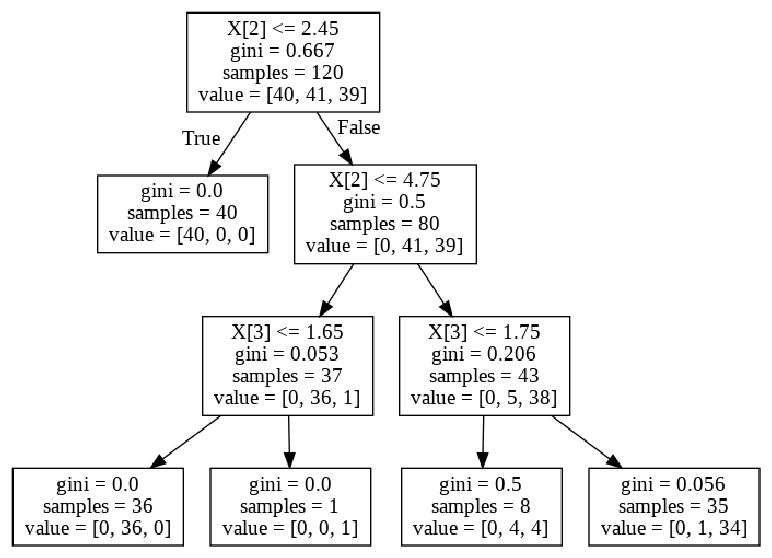

In [11]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier1, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

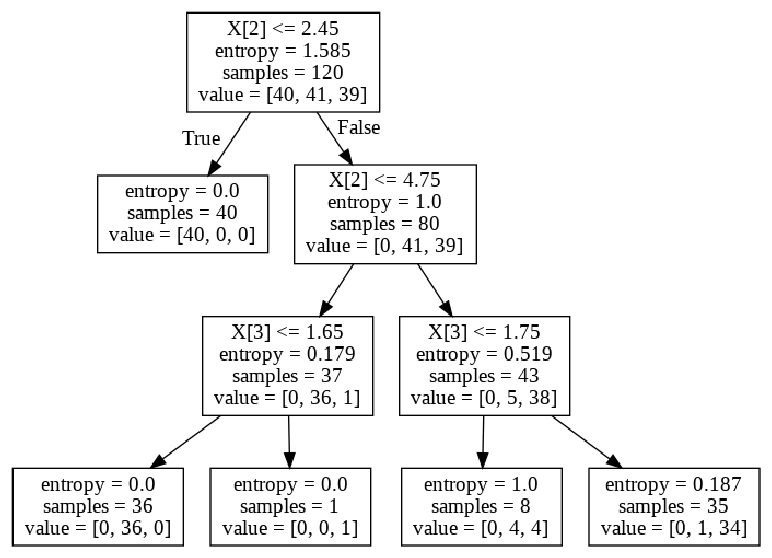

In [12]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier2, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()